In [ ]:
from pydrake.all import (Box, DiagramBuilder,
                         HPolyhedron, LinearSystem,
                         LogVectorOutput,
                         Sphere,
                         StartMeshcat, 
                         MeshcatVisualizerCpp,SceneGraph, Simulator, StartMeshcat,
                         AddMultibodyPlantSceneGraph, Parser, CoulombFriction, Cylinder, RigidTransform,
                         SpatialInertia, Sphere, UnitInertia, MakeRenderEngineVtk, RenderEngineVtkParams,
                         MeshcatVisualizerParams)
import import_ipynb
from pydrake import geometry

#import 
from RRT import (RRT, RRTStar, even_space_2d, RRT3D, RRTStar3D, even_space_3d)

from utils import (AddShape, get_sphere, getMinMaxBox)

import pydrake.symbolic as symbolic

import numpy as np
import matplotlib.pyplot as plt

from shapely.geometry import LineString, MultiPoint, Point
from shapely.ops import substring, unary_union

from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

ImportError: cannot import name 'even_space_2d' from 'RRT' (RRT.ipynb)

## RRT 2D

In [ ]:
start = np.array([11, 0]) # Start location
goal = np.array([6, 8]) # Goal location

obstacles = [ # circles parametrized by [x, y, radius]
        np.array([9, 6, 2]),
        np.array([9, 8, 1]),
        np.array([9, 10, 2]),
        np.array([4, 5, 2]),
        np.array([7, 5, 2]),
        np.array([4, 10, 1])
] 

bounds = np.array([-2, 15]) # Bounds in both x and y

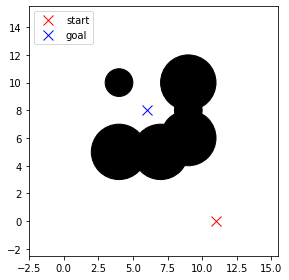

In [ ]:
def plot_scene(obstacle_list, start, goal):
    ax = plt.gca()
    for o in obstacle_list:
        circle = plt.Circle((o[0], o[1]), o[2], color='k')
        ax.add_artist(circle)
    plt.axis([bounds[0]-0.5, bounds[1]+0.5, bounds[0]-0.5, bounds[1]+0.5])
    plt.plot(start[0], start[1], "xr", markersize=10)
    plt.plot(goal[0], goal[1], "xb", markersize=10)
    plt.legend(('start', 'goal'), loc='upper left')
    plt.gca().set_aspect('equal')
    
plt.figure()
plot_scene(obstacles, start, goal)
plt.tight_layout()

### RRT Algorithm (Feasible not optimal)

In [ ]:
np.random.seed(4)
rrt = RRT(start=start,
          goal=goal,
          bounds=bounds,
          obstacle_list=obstacles)
path_rrt = rrt.plan()

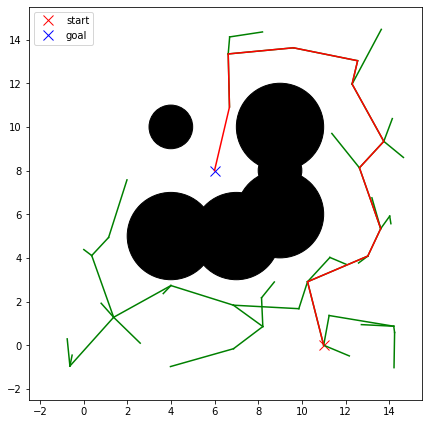

In [ ]:
plt.figure(figsize=(6,6))
plot_scene(obstacles, start, goal)
rrt.draw_graph()
if path_rrt is None:
    print("No viable path found")
else:
    plt.plot([x for (x, y) in path_rrt], [y for (x, y) in path_rrt], '-r')
plt.tight_layout()

### RRT Star

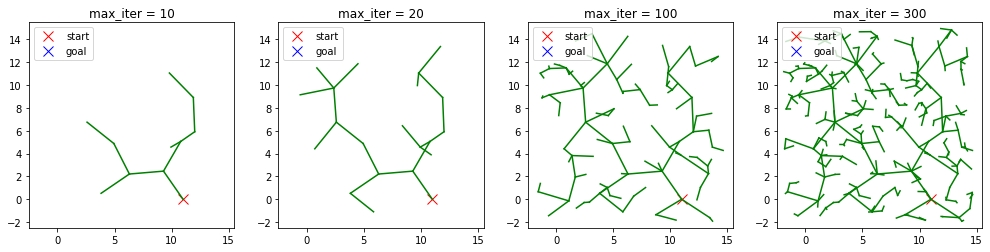

In [ ]:
max_iter_array = [10, 20, 100, 300]
plt.figure(figsize=(14,5))
goal_out_of_bound = np.array([100,100])
for i in range(4):
    plt.subplot(1, 4, i+1)
    np.random.seed(9)
    rrt = RRT(start=start,
              goal=goal_out_of_bound,
              bounds=bounds,
              obstacle_list=[],
              goal_sample_rate=0.0, 
              max_iter=max_iter_array[i])
    path = rrt.plan()
    plot_scene([], start, goal_out_of_bound)
    rrt.draw_graph()
    plt.title('max_iter = {}'.format(max_iter_array[i]))
plt.tight_layout()

In [ ]:
np.random.seed(4)
rrt_star = RRTStar(start=start,
          goal=goal,
          bounds=bounds,
          obstacle_list=obstacles)
path_rrt_star, min_cost = rrt_star.plan()
print('Minimum cost: {}'.format(min_cost))

# Check the cost
def path_cost(path):
    return sum(np.linalg.norm(path[i] - path[i + 1]) for i in range(len(path) - 1))

if path_rrt_star:
    print('Length of the found path: {}'.format(path_cost(path_rrt_star)))

Minimum cost: 17.797742907653326
Length of the found path: 17.797742907653326


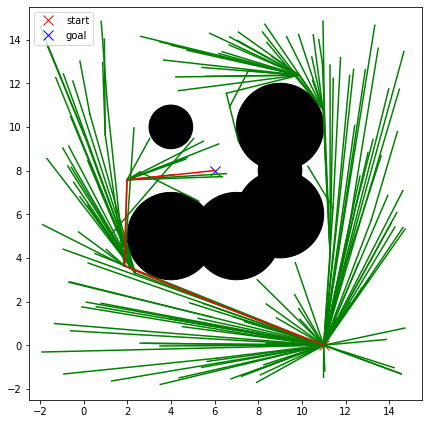

In [ ]:
plt.figure(figsize=(6,6))
plot_scene(obstacles, start, goal)
rrt_star.draw_graph()
if path_rrt_star is None:
    print("No viable path found")
else:
    plt.plot([x for (x, y) in path_rrt_star], [y for (x, y) in path_rrt_star], '-r')
plt.tight_layout()

### Even Spaced Traj Path

In [ ]:
even_space_path = even_space_2d(path_rrt_star)

NameError: name 'even_space_2d' is not defined

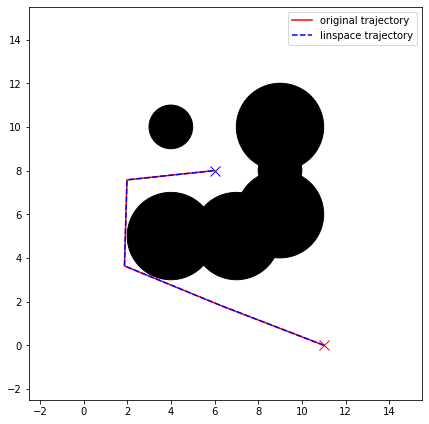

In [ ]:
plt.figure(figsize=(6,6))
plot_scene(obstacles, start, goal)

plt.plot([x for (x, y) in path_rrt_star], [y for (x, y) in path_rrt_star], '-r', label='original trajectory')
plt.plot([x for (x, y) in even_space_path], [y for (x, y) in even_space_path], '--b', label='linspace trajectory')
plt.legend()
plt.tight_layout()

## RRT 3D

In [ ]:
start = np.array([5, -4, 0]) # Start location
goal = np.array([0, 2, 0]) # Goal location

obstacles = [ # circles parametrized by [x, y, z, radius]
        np.array([3, 0, 0, 2]),
        np.array([3, 2, 0, 1]),
        np.array([3, 4, 0, 2]),
        np.array([-2, -1, 0, 2]),
        np.array([1, -1, 0, 2]),
        np.array([-2, 4, 0, 1])
] 

bounds = np.array([-6, 11]) # Bounds in both x and y and z

# obstacles = [ # circles parametrized by [x, y, z, radius]
#         np.array([3, 0, 0, 1]),
#         np.array([3, 4, 1, 1]),
#         np.array([-2, -1, 0, 1]),
#         np.array([1, -1, 0, 1]),
#         np.array([-2, 4, 0, 1])
# ] 


In [ ]:
np.random.seed(4)
rrt3d = RRT3D(start=start,
          goal=goal,
          bounds=bounds,
          obstacle_list=obstacles)
path_rrt3d = rrt3d.plan()

# Check the cost
def path_cost(path):
    return sum(np.linalg.norm(path[i] - path[i + 1]) for i in range(len(path) - 1))

if path_rrt3d:
    print('Length of the found path: {}'.format(path_cost(path_rrt3d)))

Length of the found path: 16.647140106520304


In [ ]:
np.random.seed(4)
rrt_star3d = RRTStar3D(start=start,
          goal=goal,
          bounds=bounds,
          obstacle_list=obstacles)
path_rrt_star3d, min_cost = rrt_star3d.plan()
print('Minimum cost: {}'.format(min_cost))

if path_rrt_star3d:
    print('Length of the found path: {}'.format(path_cost(path_rrt_star3d)))

Minimum cost: 11.138183557921202
Length of the found path: 11.138183557921202


<Figure size 432x288 with 0 Axes>

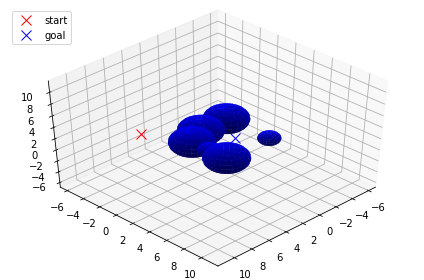

In [ ]:
def plot_scene(obstacle_list, start, goal):
    fig = plt.figure()
    ax = plt.axes(projection='3d') 
    ax.view_init(elev=45., azim=45)

    for o in obstacle_list:
        # circle = plt.Circle((o[0], o[1], o[2]), o[3], color='k')
        # ax.add_artist(circle)
        x,y,z = get_sphere(o[3], o[:3])
        ax.plot_surface(x, y, z, rstride=4, color='b')
    ax.axes.set_xlim3d(left=bounds[0]-0.5, right=bounds[1]+0.5) 
    ax.axes.set_ylim3d(bottom=bounds[0]-0.5, top=bounds[1]+0.5) 
    ax.axes.set_zlim3d(bottom=bounds[0]-0.5, top=bounds[1]+0.5) 
    ax.plot3D([start[0]], [start[1]], [start[2]], "xr", markersize=10)
    ax.plot3D([goal[0]], [goal[1]], [goal[2]], "xb", markersize=10)
    plt.legend(('start', 'goal'), loc='upper left')
    #plt.gca().set_aspect('equal')
    
plt.figure()
plot_scene(obstacles, start, goal)
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

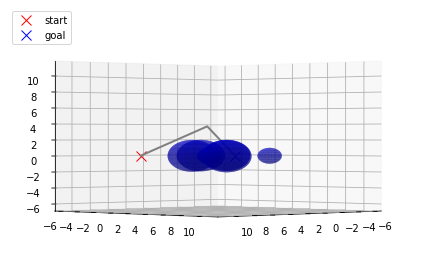

In [ ]:
def plot_scene_path(obstacle_list, start, goal, path):
    fig = plt.figure()
    ax = plt.axes(projection='3d') 
    ax.view_init(elev=0., azim=45)

    for o in obstacle_list:
        x,y,z = get_sphere(o[3], o[:3])
        ax.plot_surface(x, y, z, rstride=4, color='b', alpha=0.5)
    ax.axes.set_xlim3d(left=bounds[0]-0.5, right=bounds[1]+0.5) 
    ax.axes.set_ylim3d(bottom=bounds[0]-0.5, top=bounds[1]+0.5) 
    ax.axes.set_zlim3d(bottom=bounds[0]-0.5, top=bounds[1]+0.5) 
    ax.plot3D([start[0]], [start[1]], [start[2]], "xr", markersize=10)
    ax.plot3D([goal[0]], [goal[1]], [goal[2]], "xb", markersize=10)


    path = np.array(path)

    ax.plot3D(path[:,0], path[:,1], path[:,2], 'gray', linewidth=2)

    plt.legend(('start', 'goal'), loc='upper left')
    #plt.gca().set_aspect('equal')
    
plt.figure()
plot_scene_path(obstacles, start, goal, path_rrt_star3d)
plt.tight_layout()


In [ ]:
meshcat = StartMeshcat()

Meshcat is now available at https://931e8205-9a5c-4b8e-a3da-167564211c03.deepnoteproject.com


In [ ]:
def generate_path_scene(obstacles, start, end, path):
    builder = DiagramBuilder()

    # Create the physics engine + scene graph.
    plant, scene_graph = AddMultibodyPlantSceneGraph(builder, time_step=0.0)

    parser = Parser(plant)

    for i, obs in enumerate(obstacles):
        x,y,z,r = obs
        obstacle = AddShape(plant, geometry.Sphere(r), name=f"sphere_{i}", color = [1,0,0,1])
        plant.WeldFrames(plant.world_frame(), plant.GetFrameByName(f"sphere_{i}"), RigidTransform(p=[x,y,z]))

    start_sphere = AddShape(plant, geometry.Sphere(0.2), name=f"start", color = [0,1,0,1])
    plant.WeldFrames(plant.world_frame(), plant.GetFrameByName(f"start"), RigidTransform(p=[start[0],start[1],start[2]]))

    end_sphere = AddShape(plant, geometry.Sphere(0.2), name=f"end", color = [0,0,1,1])
    plant.WeldFrames(plant.world_frame(), plant.GetFrameByName(f"end"), RigidTransform(p=[end[0],end[1],end[2]]))

    for i, p in enumerate(path):
        x,y,z = p
        path = AddShape(plant, geometry.Sphere(0.15), name=f"path_{i}", color = [0,0,0,1])
        plant.WeldFrames(plant.world_frame(), plant.GetFrameByName(f"path_{i}"), RigidTransform(p=[x,y,z]))

    # Add a rendering engine
    renderer = "my_renderer"
    scene_graph.AddRenderer(renderer,
                            MakeRenderEngineVtk(RenderEngineVtkParams()))

    plant.Finalize()

    params = MeshcatVisualizerParams()
    #    params.delete_on_initialization_event = False
    visualizer = MeshcatVisualizerCpp.AddToBuilder(
        builder, scene_graph, meshcat, params)


    diagram = builder.Build()
    diagram.set_name("obstacle demo")

    return diagram

In [ ]:
np.random.seed(4)
rrt3d = RRT3D(start=start,
          goal=goal,
          bounds=bounds,
          obstacle_list=obstacles)
path_rrt3d = rrt3d.plan()

# Check the cost

def path_cost(path):
    return sum(np.linalg.norm(path[i] - path[i + 1]) for i in range(len(path) - 1))

if path_rrt3d:
    print('Length of the found path: {}'.format(path_cost(path_rrt3d)))

#system = generate_initial_scene(obstacles, start, goal)
system = generate_path_scene(obstacles, start, goal, even_space_3d(path_rrt3d, 0.4))
meshcat.Delete()
# Evaluate the camera output ports to get the images.
context = system.CreateDefaultContext()
system.Publish(context)

Length of the found path: 16.647140106520304


In [ ]:
np.random.seed(2)
rrt_star3d = RRTStar3D(start=start,
          goal=goal,
          bounds=bounds,
          obstacle_list=obstacles)
path_rrt_star3d, min_cost = rrt_star3d.plan()

# Check the cost
def path_cost(path):
    return sum(np.linalg.norm(path[i] - path[i + 1]) for i in range(len(path) - 1))

print('Minimum cost: {}'.format(min_cost))

if path_rrt_star3d:
    print('Length of the found path: {}'.format(path_cost(path_rrt_star3d)))

#system = generate_initial_scene(obstacles, start, goal)
even_space_path = even_space_3d(path_rrt_star3d, 0.4)
system = generate_path_scene(obstacles, start, goal, even_space_path)
meshcat.Delete()

context = system.CreateDefaultContext()
system.Publish(context)

Minimum cost: 10.601698856711517
Length of the found path: 10.601698856711517


In [ ]:
print(even_space_path)

[(5.0, -4.0, 0.0), (4.810510927367304, -3.7176959662168034, 0.21070909772132934), (4.621021854734607, -3.435391932433607, 0.4214181954426587), (4.431532782101911, -3.1530878986504103, 0.6321272931639881), (4.242043709469215, -2.8707838648672137, 0.8428363908853174), (4.052554636836518, -2.588479831084017, 1.0535454886066467), (3.863065564203822, -2.3061757973008206, 1.2642545863279762), (3.6735764915711258, -2.023871763517624, 1.4749636840493054), (3.4840874189384294, -1.7415677297344274, 1.6856727817706347), (3.294598346305733, -1.4592636959512308, 1.896381879491964), (3.105109273673037, -1.1769596621680343, 2.1070909772132933), (3.0782479542653824, -1.1369412129975158, 2.1369603744157537), (2.8262931203967567, -0.8801823313482129, 1.9620500019833778), (2.574338286528131, -0.62342344969891, 1.7871396295510018), (2.3223834526595053, -0.366664568049607, 1.6122292571186259), (2.0704286187908796, -0.10990568640030407, 1.43731888468625), (1.8184737849222539, 0.14685319524899887, 1.26240851

## Square Obstacles + RRT for Squares

In [ ]:
def plot_boxes(boxes, path):
    fig = plt.figure()
    ax = plt.axes(projection='3d') 
    ax.view_init(elev=10., azim=40)

    for box in boxes:
        ((xmin, ymin, zmin), (xmax, ymax, zmax)) = box

        ax.set(xlim=[xmin-10, xmax+10], ylim=[ymin-10, ymax+10], zlim=[zmin-10, zmax+10])

        # Plot edges
        edges_kw = dict(color='black', linewidth=2, zorder=1e3)
        ax.plot([xmax, xmax], [ymin, ymax],[zmin, zmin], 0, **edges_kw)
        ax.plot([xmin, xmin], [ymin, ymax], [zmin, zmin],0, **edges_kw)
        ax.plot([xmin, xmax], [ymin, ymin], [zmin, zmin],0, **edges_kw)
        ax.plot([xmin, xmax], [ymax, ymax], [zmin, zmin],0, **edges_kw)

        ax.plot([xmax, xmax], [ymin, ymax], [zmax, zmax], 0, **edges_kw)
        ax.plot([xmin, xmin], [ymin, ymax], [zmax, zmax], 0, **edges_kw)
        ax.plot([xmin, xmax], [ymin, ymin], [zmax, zmax], 0, **edges_kw)
        ax.plot([xmin, xmax], [ymax, ymax], [zmax, zmax], 0, **edges_kw)


        ax.plot([xmax, xmax], [ymin, ymin], [zmin, zmax], **edges_kw)
        ax.plot([xmax, xmax], [ymax, ymax], [zmin, zmax], **edges_kw)
        ax.plot([xmin, xmin], [ymax, ymax], [zmin, zmax], **edges_kw)
        ax.plot([xmin, xmin], [ymin, ymin], [zmin, zmax], **edges_kw)

        ax.plot3D(path[:,0], path[:,1], path[:,2], 'red', linewidth=2)

        # plt.legend(('start', 'goal'), loc='upper left')
        #plt.gca().set_aspect('equal')

        plt.figure()
        plt.tight_layout()

False
[-1.  0.  0.]
0.0
15.000015000015 10.00001000001
-5000000.0 5000000.0
True


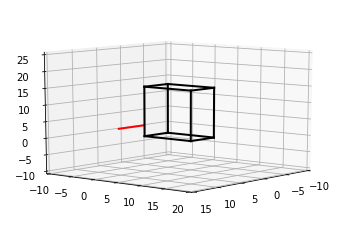

<Figure size 432x288 with 0 Axes>

In [ ]:
box1 = [[0,0,0], [5,10,15]]
v1 = np.array([[15,5,5], [10,5,5]]) #x is closest
plot_boxes([box1], v1)

print(CheckLineBox(box1[0], box1[1], v1[0], v1[1]))

print(check_box_ray_collision(box1, v1))

In [ ]:
def generate_path_scene_box(obstacles, start=None, end=None, path=None, spheres=None, ellipses=None):
    builder = DiagramBuilder()

    # Create the physics engine + scene graph.
    plant, scene_graph = AddMultibodyPlantSceneGraph(builder, time_step=0.0)

    parser = Parser(plant)

    # Create ground body
    ground = AddShape(plant, geometry.Box(20,20,2.0), name="ground", mu=0.5, color = [1,1,1,1])
    plant.WeldFrames(plant.world_frame(), plant.GetFrameByName("ground"), RigidTransform(p=[0,0,-1.0]))

    print(obstacles)
    if obstacles is not None:
        for i, obs in enumerate(obstacles):
            (x,y,z,w,h,d) = obs
            obstacle = AddShape(plant, geometry.Box(w,h,d), name=f"box_{i}", color = [1,0,0,0.5])
            plant.WeldFrames(plant.world_frame(), plant.GetFrameByName(f"box_{i}"), RigidTransform(p=[x,y,z]))

    if spheres is not None:
        for i, obs in enumerate(spheres):
            (x,y,z,r) = obs
            obstacle = AddShape(plant, geometry.Sphere(r), name=f"sphere_{i}", color = [0,1,0,0.8])
            plant.WeldFrames(plant.world_frame(), plant.GetFrameByName(f"sphere_{i}"), RigidTransform(p=[x,y,z]))


    if ellipse is not None:
        for i, obs in enumerate(ellipse):
            (x,y,z,a,b,c) = obs
            obstacle = AddShape(plant, geometry.Ellipsoid(a,b,c), name=f"ellipse_{i}", color = [0,1,1,0.5])
            plant.WeldFrames(plant.world_frame(), plant.GetFrameByName(f"ellipse_{i}"), RigidTransform(p=[x,y,z]))

    if start is not None:
        start_sphere = AddShape(plant, geometry.Sphere(0.2), name=f"start", color = [0,1,0,1])
        plant.WeldFrames(plant.world_frame(), plant.GetFrameByName(f"start"), RigidTransform(p=[start[0],start[1],start[2]]))

    if end is not None:
        end_sphere = AddShape(plant, geometry.Sphere(0.2), name=f"end", color = [0,0,1,1])
        plant.WeldFrames(plant.world_frame(), plant.GetFrameByName(f"end"), RigidTransform(p=[end[0],end[1],end[2]]))

    if path is not None:
        for i, p in enumerate(path):
            x,y,z = p
            path = AddShape(plant, geometry.Sphere(0.05), name=f"path_{i}", color = [0,0,0,1])
            plant.WeldFrames(plant.world_frame(), plant.GetFrameByName(f"path_{i}"), RigidTransform(p=[x,y,z]))

    # Add a rendering engine
    renderer = "my_renderer"
    scene_graph.AddRenderer(renderer,
                            MakeRenderEngineVtk(RenderEngineVtkParams()))

    plant.Finalize()

    params = MeshcatVisualizerParams()
    #    params.delete_on_initialization_event = False
    visualizer = MeshcatVisualizerCpp.AddToBuilder(
        builder, scene_graph, meshcat, params)


    diagram = builder.Build()
    diagram.set_name("obstacle demo")

    return diagram

In [ ]:
box_obstacles = np.array([[0,0,0,0.5,1,2]]) #[x,y,z,w,h,d] (x,y,z is the center of the box)
vector = np.array([[0,0.7,-1.2], [0,-0.7,1.2]])
path = even_space_3d(vector, 0.1)
system = generate_path_scene_box(box_obstacles, None, None, path)
meshcat.Delete()

'''
# Tests:
1) all edges (1,2,3,4,5,6,7,8,9,10,11,12)
2) through each face (through and through)
3) through each face, only one side potruding

'''

box0 = getMinMaxBox(box_obstacles[0])
print(f"Line in Collision with Box? {CheckLineBox(box0[0], box0[1], vector[0], vector[1])}")

context = system.CreateDefaultContext()
system.Publish(context)

Line in Collision with Box? True


## Box obstacles

In [ ]:
class RRT3DBox:
 
    class Node:
        def __init__(self, p):
            self.p = np.array(p)
            self.parent = None

    def __init__(self, start, goal, obstacle_list, bounds, 
                 max_extend_length=3.0, path_resolution=0.5, 
                 goal_sample_rate=0.05, max_iter=300):
        self.start = self.Node(start)
        self.goal = self.Node(goal)
        self.bounds = bounds #either (,2) or (3x2)
        self.max_extend_length = max_extend_length
        self.path_resolution = path_resolution
        self.goal_sample_rate = goal_sample_rate
        self.max_iter = max_iter
        self.obstacle_list = obstacle_list
        self.node_list = []

    def plan(self):
        """Plans the path from start to goal while avoiding obstacles"""
        self.node_list = [self.start]
        for i in range(self.max_iter):
            if i%50 == 0:
                print(f'Iters: {i}')
            # modify here: 
            # 1) Create a random node (rnd_node) inside 
            # the bounded environment
            # 2) Find nearest node (nearest_node)
            # 3) Get new node (new_node) by connecting
            # rnd_node and nearest_node. Hint: steer
            # 4) If the path between new_node and the
            # nearest node is not in collision, add it to the node_list
            rnd_node = self.get_random_node()
            nearest_node = self.get_nearest_node(self.node_list, rnd_node)
            new_node = self.steer(nearest_node, rnd_node, self.max_extend_length)

            if not self.collision(nearest_node, new_node, self.obstacle_list):
                self.node_list.append(new_node)
    
            # Don't need to modify beyond here
            # If the new_node is very close to the goal, connect it
            # directly to the goal and return the final path
            if self.dist_to_goal(self.node_list[-1].p) <= self.max_extend_length:
                final_node = self.steer(self.node_list[-1], self.goal, self.max_extend_length)
                if not self.collision(final_node, self.node_list[-1], self.obstacle_list):
                    print(f'Final number of iterations {i}')
                    return self.final_path(len(self.node_list) - 1)
        return None  # cannot find path

    def steer(self, from_node, to_node, max_extend_length=np.inf):
        """Connects from_node to a new_node in the direction of to_node
        with maximum distance max_extend_length
        """
        new_node = self.Node(to_node.p)
        d = from_node.p - to_node.p
        dist = np.linalg.norm(d)
        if dist > max_extend_length:
            # rescale the path to the maximum extend_length
            new_node.p  = from_node.p - d / dist * max_extend_length
        new_node.parent = from_node
        return new_node

    def dist_to_goal(self, p):
        """Distance from p to goal"""
        return np.linalg.norm(p - self.goal.p)

    def get_random_node(self):
        """Sample random node inside bounds or sample goal point"""
        if np.random.rand() > self.goal_sample_rate:
            # Sample random point inside boundaries
            if len(self.bounds) == 2: #same bounds for all 
                rnd = self.Node(np.random.rand(3)*(self.bounds[1]-self.bounds[0]) + self.bounds[0])
            else:
                rnd_x = np.random.rand(1)*(self.bounds[0][1]-self.bounds[0][0]) + self.bounds[0][0]
                rnd_y = np.random.rand(1)*(self.bounds[1][1]-self.bounds[1][0]) + self.bounds[1][0]
                rnd_z = np.random.rand(1)*(self.bounds[2][1]-self.bounds[2][0]) + self.bounds[2][0]
                rnd = self.Node(np.concatenate([rnd_x,rnd_y,rnd_z]))
        else: 
            # Select goal point
            rnd = self.Node(self.goal.p)
        return rnd
    
    @staticmethod
    def get_nearest_node(node_list, node):
        """Find the nearest node in node_list to node"""
        dlist = [np.sum(np.square((node.p - n.p))) for n in node_list]
        minind = dlist.index(min(dlist))
        return node_list[minind]
    
    @staticmethod
    def collision(node1, node2, obstacle_list):
        """Check whether the path connecting node1 and node2 
        is in collision with anyting from the obstacle_list
        # this is now for boxes
        """
        p1 = node2.p
        p2 = node1.p 
        for box in obstacle_list:
            x,y,z,w,h,d = box
            
            (b1, b2) = getMinMaxBox(box) #returns list of [xmin, ymin, zmin] and [xmax, ymax, zmax]

            is_collide = CheckLineBox(b1, b2, p1, p2)

            if is_collide:
                return True # is in collision
        return False # is not in collision
    
    def final_path(self, goal_ind):
        """Compute the final path from the goal node to the start node"""
        path = [self.goal.p]
        node = self.node_list[goal_ind]
        # modify here: Generate the final path from the goal node to the start node.
        # We will check that path[0] == goal and path[-1] == start
        while node is not None:
            path.append(node.p)
            node = node.parent

        return path

    def draw_graph(self):
        for node in self.node_list:
            if node.parent:
                plt.plot([node.p[0], node.parent.p[0]], [node.p[1], node.parent.p[1]], [node.p[2], node.parent.p[2]], "-g")

In [ ]:
class RRTStar3DBox(RRT3DBox):
    
    class Node(RRT.Node):
        def __init__(self, p):
            super().__init__(p)
            self.cost = 0.0

    def __init__(self, start, goal, obstacle_list, bounds,
                 max_extend_length=5.0,
                 path_resolution=0.5,
                 goal_sample_rate=0.0,
                 max_iter=300,
                 connect_circle_dist=50.0
                 ):
        super().__init__(start, goal, obstacle_list, bounds, max_extend_length,
                         path_resolution, goal_sample_rate, max_iter)
        self.connect_circle_dist = connect_circle_dist
        self.goal = self.Node(goal)

    def plan(self):
        """Plans the path from start to goal while avoiding obstacles"""
        self.node_list = [self.start]
        for i in range(self.max_iter):
            if i%50 == 0:
                print(f'Iters: {i}')
            # Create a random node inside the bounded environment
            rnd = self.get_random_node()
            # Find nearest node
            nearest_node = self.get_nearest_node(self.node_list, rnd)
            # Get new node by connecting rnd_node and nearest_node
            new_node = self.steer(nearest_node, rnd, self.max_extend_length)
            # If path between new_node and nearest node is not in collision:
            if not self.collision(new_node, nearest_node, self.obstacle_list):
                near_inds = self.near_nodes_inds(new_node)
                # Connect the new node to the best parent in near_inds
                new_node = self.choose_parent(new_node, near_inds)
                self.node_list.append(new_node)
                # Rewire the nodes in the proximity of new_node if it improves their costs
                self.rewire(new_node, near_inds)
        last_index, min_cost = self.best_goal_node_index()
        if last_index:
            print(f'Final number of iterations {i}')
            return self.final_path(last_index), min_cost
        return None, min_cost

    def choose_parent(self, new_node, near_inds):
        """Set new_node.parent to the lowest resulting cost parent in near_inds and
        new_node.cost to the corresponding minimal cost
        """
        min_cost = np.inf
        best_near_node = None
        # modify here: Go through all near nodes and evaluate them as potential parent nodes by
        # 1) checking whether a connection would result in a collision,
        # 2) evaluating the cost of the new_node if it had that near node as a parent,
        # 3) picking the parent resulting in the lowest cost and updating
        #    the cost of the new_node to the minimum cost.
        for ind in near_inds:
            potential_parent = self.node_list[ind]
            if not self.collision(potential_parent, new_node, self.obstacle_list):
                potential_cost = self.new_cost(potential_parent, new_node)
                if potential_cost < min_cost:
                    min_cost = potential_cost
                    best_near_node = potential_parent
                
        # Don't need to modify beyond here
        new_node.cost = min_cost
        new_node.parent = best_near_node
        return new_node
    
    def rewire(self, new_node, near_inds):
        """Rewire near nodes to new_node if this will result in a lower cost"""
        # modify here: Go through all near nodes and check whether rewiring them
        # to the new_node would: 
        # A) Not cause a collision and
        # B) reduce their own cost.
        # If A and B are true, update the cost and parent properties of the node.
        for ind in near_inds: 
            current_node = self.node_list[ind]
            new_cost = self.new_cost(new_node, current_node)
            if not self.collision(current_node, new_node, self.obstacle_list) and new_cost < current_node.cost:
                current_node.cost = new_cost
                current_node.parent = new_node

        # Don't need to modify beyond here
        self.propagate_cost_to_leaves(new_node)

    def best_goal_node_index(self):
        """Find the lowest cost node to the goal"""
        min_cost = np.inf
        best_goal_node_idx = None
        for i in range(len(self.node_list)):
            node = self.node_list[i]
            # Has to be in close proximity to the goal
            if self.dist_to_goal(node.p) <= self.max_extend_length:
                # Connection between node and goal needs to be collision free
                if not self.collision(self.goal, node, self.obstacle_list):
                    # The final path length
                    cost = node.cost + self.dist_to_goal(node.p) 
                    if node.cost + self.dist_to_goal(node.p) < min_cost:
                        # Found better goal node!
                        min_cost = cost
                        best_goal_node_idx = i
        return best_goal_node_idx, min_cost

    def near_nodes_inds(self, new_node):
        """Find the nodes in close proximity to new_node"""
        nnode = len(self.node_list) + 1
        r = self.connect_circle_dist * np.sqrt((np.log(nnode) / nnode))
        dlist = [np.sum(np.square((node.p - new_node.p))) for node in self.node_list]
        near_inds = [dlist.index(i) for i in dlist if i <= r ** 2]
        return near_inds

    def new_cost(self, from_node, to_node):
        """to_node's new cost if from_node were the parent"""
        d = np.linalg.norm(from_node.p - to_node.p)
        return from_node.cost + d

    def propagate_cost_to_leaves(self, parent_node):
        """Recursively update the cost of the nodes"""
        for node in self.node_list:
            if node.parent == parent_node:
                node.cost = self.new_cost(parent_node, node)
                self.propagate_cost_to_leaves(node)

In [ ]:
box_obstacles = [
    np.array([-2,-2,2, 2,0.5,4]),
    np.array([-0.75,-1,2, 0.5,2,4]),
    np.array([-3.25,-1,2, 0.5,2,4])
]

start = np.array([-2,-4,0.2])
goal = np.array([-2,-1,0.2])


system = generate_path_scene_box(box_obstacles, start, goal, None)
meshcat.Delete()
context = system.CreateDefaultContext()
system.Publish(context)

bounds = np.array([[-8,8],[-8,8],[0,4]]) #all obstacles will have height of 5

In [ ]:
np.random.seed(4)
rrt3dbox = RRT3DBox(start=start,
          goal=goal,
          bounds=bounds,
          obstacle_list=box_obstacles)
path_rrt3dbox = rrt3dbox.plan()

# Check the cost
def path_cost(path):
    return sum(np.linalg.norm(path[i] - path[i + 1]) for i in range(len(path) - 1))

if path_rrt3dbox:
    print('Length of the found path: {}'.format(path_cost(path_rrt3dbox)))

Iters: 0
Iters: 50
Iters: 100
Iters: 150
Final number of iterations 169
Length of the found path: 19.892521344255833


In [ ]:
box_obstacles = [
    np.array([-2,-2,2, 2,0.5,4]),
    np.array([-0.75,-1,2, 0.5,2,4]),
    np.array([-3.25,-1,2, 0.5,2,4])
]

start = np.array([-2,-4,0.2])
goal = np.array([-2,-1,0.2])



system = generate_path_scene_box(box_obstacles, start, goal, even_space_3d(path_rrt3dbox,0.2))
meshcat.Delete()
context = system.CreateDefaultContext()
system.Publish(context)

In [ ]:
np.random.seed(3)

rrt3dstarbox = RRTStar3DBox(start=start,
          goal=goal,
          bounds=bounds,
          obstacle_list=box_obstacles)
path_rrtstarbox, min_cost = rrt3dstarbox.plan()

if path_rrt3dbox:
    print('Length of the found path: {}'.format(path_cost(path_rrtstarbox)))

print(f'Min cost found: {min_cost}')

Iters: 0
Iters: 50
Iters: 100
Iters: 150
Iters: 200
Iters: 250
Final number of iterations 299
Length of the found path: 8.800048229772182
Min cost found: 8.80004822977218


In [ ]:
system = generate_path_scene_box(box_obstacles, start, goal, even_space_3d(path_rrtstarbox,0.2))
meshcat.Delete()
context = system.CreateDefaultContext()
system.Publish(context)

## Create Obstacle Courses

In [ ]:
import copy

def visualize_obstacles(obstacles, start, goal, path=None, spheres=None, ellipses=None):
    system = generate_path_scene_box(obstacles, start, goal, path, spheres, ellipses)
    meshcat.Delete()
    context = system.CreateDefaultContext()
    system.Publish(context)

def add_tolerance(obstacles, epsilon):
    new_obstacles = copy.deepcopy(obstacles)
    new_obstacles[:,3:] += epsilon
    return new_obstacles

In [ ]:
np.random.seed(3)

In [ ]:
# Course 1
box_obstacles = np.array([
    np.array([-2,-2,2, 2,0.5,4]),
    np.array([-0.75,-1,2, 0.5,2,4]),
    np.array([-3.25,-1,2, 0.5,2,4])
])

epsilon = 0.5
start = np.array([-2,-4,0.2])
goal = np.array([-2,-1,1])
bounds = np.array([[-8,8],[-8,8],[0,4]]) #all obstacles will have height of 5

#visualize_obstacles(box_obstacles, start, goal)

rrt3dstarbox = RRTStar3DBox(start=start,
          goal=goal,
          bounds=bounds,
          obstacle_list=add_tolerance(box_obstacles, epsilon))
path_rrtstarbox, min_cost = rrt3dstarbox.plan()

even_space =  even_space_3d(path_rrtstarbox, 0.2)
print(even_space)

Iters: 0
Iters: 50
Iters: 100
Iters: 150
Iters: 200
Iters: 250
Final number of iterations 299
[(-2.0, -4.0, 0.2), (-2.1409002935364425, -3.9108999036182968, 0.31049097983875346), (-2.281800587072885, -3.8217998072365935, 0.4209819596775069), (-2.4227008806093275, -3.7326997108548903, 0.5314729395162603), (-2.56360117414577, -3.643599614473187, 0.6419639193550137), (-2.7045014676822126, -3.554499518091484, 0.7524548991937672), (-2.845401761218655, -3.4653994217097805, 0.8629458790325206), (-2.9863020547550976, -3.3762993253280773, 0.9734368588712741), (-3.12720234829154, -3.287199228946374, 1.0839278387100275), (-3.2681026418279826, -3.198099132564671, 1.194418818548781), (-3.409002935364425, -3.1089990361829676, 1.3049097983875344), (-3.5499032289008676, -3.0198989398012643, 1.4154007782262878), (-3.69080352243731, -2.930798843419561, 1.5258917580650413), (-3.8317038159737526, -2.841698747037858, 1.6363827379037947), (-3.972604109510195, -2.7525986506561546, 1.7468737177425482), (-4.11

In [ ]:
# Course 2
box_obstacles = np.array([
    np.array([-2,-2,2, 4,0.5,4]),
    np.array([0.25,-1,2, 0.5,2,4]),
    np.array([-4.25,-1,2, 0.5,2,4])
])

# collision avoidance tolerance
epsilon = 0.5

start = np.array([-2,-6,0.2])
goal = np.array([-2,-1,1])
bounds = np.array([[-8,8],[-8,8],[0,4]]) #all obstacles will have height of 5

rrt3dstarbox = RRTStar3DBox(start=start,
          goal=goal,
          bounds=bounds,
          obstacle_list=add_tolerance(box_obstacles, epsilon))
path_rrtstarbox, min_cost = rrt3dstarbox.plan()

even_space =  even_space_3d(path_rrtstarbox, 0.2)
print(even_space)

##if path_rrt3dbox:
#    print('Length of the found path: {}'.format(path_cost(path_rrtstarbox)))

print(f'Min cost found: {min_cost}')

#visualize_obstacles(box_obstacles, start, goal, even_space_3d(path_rrtstarbox, 0.2))

Iters: 0
Iters: 50
Iters: 100
Iters: 150
Iters: 200
Iters: 250
Final number of iterations 299
[(-2.0, -6.0, 0.2), (-1.872916602112708, -5.846385209268204, 0.21588364095072532), (-1.7458332042254159, -5.6927704185364085, 0.23176728190145063), (-1.6187498063381238, -5.539155627804613, 0.24765092285217594), (-1.4916664084508318, -5.385540837072817, 0.26353456380290124), (-1.3645830105635397, -5.231926046341021, 0.27941820475362655), (-1.2374996126762476, -5.078311255609226, 0.29530184570435186), (-1.1104162147889556, -4.92469646487743, 0.31118548665507717), (-0.9833328169016635, -4.771081674145634, 0.3270691276058025), (-0.8562494190143715, -4.617466883413838, 0.3429527685565278), (-0.7291660211270794, -4.463852092682043, 0.3588364095072531), (-0.6020826232397873, -4.310237301950247, 0.3747200504579784), (-0.4749992253524953, -4.156622511218451, 0.3906036914087037), (-0.3479158274652032, -4.003007720486655, 0.406487332359429), (-0.22083242957791116, -3.8493929297548597, 0.4223709733101543

In [ ]:
# Course 3: Like course 2 but with a hole through the center
box_obstacles = np.array([
    np.array([-2,-2,0.75, 4,0.5,1.5]),
    np.array([-2,-2,3.25, 4,0.5,1.5]),
    np.array([0.25,-1,2, 0.5,2,4]), #right side
    np.array([-4.25,-1,2, 0.5,2,4]) #left side
])

start = np.array([-2,-6,0.2])
goal = np.array([-2,-1,0.2])
bounds = np.array([[-8,8],[-8,8],[0,4]]) #all obstacles will have height of 5

rrt3dstarbox = RRTStar3DBox(start=start,
          goal=goal,
          bounds=bounds,
          obstacle_list=add_tolerance(box_obstacles, epsilon))
path_rrtstarbox, min_cost = rrt3dstarbox.plan()

even_space =  even_space_3d(path_rrtstarbox, 0.2)
print(even_space)



#if path_rrt3dbox:
#    print('Length of the found path: {}'.format(path_cost(path_rrtstarbox)))

print(f'Min cost found: {min_cost}')

#visualize_obstacles(box_obstacles, start, goal, even_space_3d(path_rrtstarbox, 0.2))

Iters: 0
Iters: 50
Iters: 100
Iters: 150
Iters: 200
Iters: 250
Final number of iterations 299
[(-2.0, -6.0, 0.2), (-1.9390207609355223, -5.856520837095251, 0.3252805693994015), (-1.8780415218710447, -5.713041674190501, 0.45056113879880294), (-1.817062282806567, -5.569562511285752, 0.5758417081982043), (-1.7560830437420893, -5.4260833483810025, 0.7011222775976058), (-1.6951038046776117, -5.282604185476253, 0.8264028469970073), (-1.634124565613134, -5.139125022571504, 0.9516834163964087), (-1.5731453265486564, -4.995645859666754, 1.0769639857958102), (-1.5121660874841787, -4.852166696762005, 1.2022445551952117), (-1.451186848419701, -4.708687533857256, 1.3275251245946131), (-1.407195058551867, -4.605178449753334, 1.4179053354351163), (-1.4572519595469045, -4.414041138944119, 1.448902410811988), (-1.5073088605419418, -4.222903828134905, 1.4798994861888595), (-1.5573657615369791, -4.031766517325691, 1.510896561565731), (-1.6074226625320165, -3.8406292065164767, 1.5418936369426026), (-1.657

In [ ]:
# MAZE COURSE
box_obstacles = np.array([
    np.array([-5,-3,2, 0.5,6,4]),
    np.array([-3,-3.75,2, 0.5,4.5,4]),

    np.array([-2,0.25,2, 6.5,0.5,4]),
    np.array([0,-1.75,2, 5.5,0.5,4]),

    np.array([1.,2.75,2, 0.5,4.5,4]),
    np.array([3,1.5,2, 0.5,7,4]),

])

start = np.array([-4,-5.5,0.2])
goal = np.array([2,4.5,0.2])
bounds = np.array([[-4.1,8],[-5.6,8],[0,4]]) #all obstacles will have height of 5

rrt3dstarbox = RRTStar3DBox(start=start,
          goal=goal,
          bounds=bounds,
          obstacle_list=add_tolerance(box_obstacles, 0.2), max_iter=500)
path_rrtstarbox, min_cost = rrt3dstarbox.plan()


#if path_rrt3dbox:
#    print('Length of the found path: {}'.format(path_cost(path_rrtstarbox)))

#print(f'Min cost found: {min_cost}')

even_space =  even_space_3d(path_rrtstarbox, 0.2)
print(even_space)

Iters: 0
Iters: 50
Iters: 100
Iters: 150
Iters: 200
Iters: 250
Iters: 300
Iters: 350
Iters: 400
Iters: 450
Final number of iterations 499
[(-4.0, -5.5, 0.2), (-3.976503641338711, -5.304861327662786, 0.23699732336410737), (-3.9530072826774223, -5.109722655325571, 0.2739946467282147), (-3.9295109240161334, -4.914583982988357, 0.31099197009232205), (-3.9060145653548446, -4.7194453106511425, 0.3479892934564294), (-3.8825182066935557, -4.524306638313928, 0.3849866168205368), (-3.859021848032267, -4.329167965976714, 0.42198394018464414), (-3.835525489370978, -4.134029293639499, 0.4589812635487515), (-3.812029130709689, -3.938890621302285, 0.49597858691285884), (-3.7885327720484003, -3.7437519489650706, 0.5329759102769662), (-3.7650364133871115, -3.548613276627856, 0.5699732336410736), (-3.7415400547258226, -3.353474604290642, 0.6069705570051809), (-3.7180436960645338, -3.1583359319534274, 0.6439678803692883), (-3.694547337403245, -2.963197259616213, 0.6809652037333955), (-3.671050978741956, 

In [ ]:
def fill_spheres(box):
    x,y,z,w,h,d = box

    r = min(w,h)/2
    epsilon = r
    overlap_factor = 0.5 # in range (0, 1]
    assert 0 < overlap_factor <= 1

    if w<h:
        moving_axis = 1
        static_axis = 0
    else:
        moving_axis = 0
        static_axis = 1

    z_coord = z + d/2

    spheres = []
    # static_coord = box[static_axis]
    # moving_coord = box[moving_axis] - box[moving_axis+3]/2

    while z_coord - r >= z - d/2 - epsilon:
        static_coord = box[static_axis]
        moving_coord = box[moving_axis] - box[moving_axis+3]/2
        while moving_coord + r <= box[moving_axis] + box[moving_axis+3]/2 + epsilon:
            spheres.append([0,0,z_coord,r])
            spheres[-1][moving_axis] = moving_coord
            spheres[-1][static_axis] = static_coord
            moving_coord += 2*r*overlap_factor

        z_coord -= 2*r*overlap_factor
          
    return spheres

def get_all_spheres(box_obstacles):
    sphere_obstacles = []
    for box in box_obstacles:
        sphere_obstacles += fill_spheres(box)
    return sphere_obstacles


# Course 1
box_obstacles = np.array([
    np.array([-2,-2,2, 2,0.5,4]),
    np.array([-0.75,-1,2, 0.5,2,4]),
    np.array([-3.25,-1,2, 0.5,2,4])
])
# box_obstacles = np.array([
#     np.array([-2,-2,2, 2,0.5,4]),
# ])

sphere_obstacles = get_all_spheres(box_obstacles)
sphere_obstacles = np.array(sphere_obstacles)
print(sphere_obstacles)

start = np.array([-2,-4,0.2])
goal = np.array([-2,-1,0.2])
bounds = np.array([[-8,8],[-8,8],[0,4]]) #all obstacles will have height of 5

#visualize_obstacles(None, start=None, goal=None, spheres=sphere_obstacles)

rrt_star3d = RRTStar3DBox(start=start,
          goal=goal,
          bounds=bounds,
          obstacle_list=box_obstacles)
path_rrt_star3d = rrt_star3d.plan()

print(path_rrt_star3d)
even_space_path = even_space_3d(path_rrt_star3d, 0.2)
print(even_space_path)



[[-3.   -2.    4.    0.25]
 [-2.75 -2.    4.    0.25]
 [-2.5  -2.    4.    0.25]
 ...
 [-3.25 -0.5   0.    0.25]
 [-3.25 -0.25  0.    0.25]
 [-3.25  0.    0.    0.25]]
Iters: 0
Iters: 50
Iters: 100
Iters: 150
Iters: 200
Iters: 250
Final number of iterations 299
([array([-2. , -1. ,  0.2]), array([-2.80466643, -0.08499958,  0.93938541]), array([-0.09714572,  0.1378537 ,  2.59664938]), array([ 0.02806842, -2.34550235,  1.32775883]), array([-2. , -4. ,  0.2])], 10.249066362221908)


TypeError: cannot unpack non-iterable numpy.float64 object

In [ ]:
box_obstacles = np.array([
    np.array([-2,-2,2, 2,0.5,4]),
])

ellipses = []
for box in box_obstacles:
    x,y,z,w,h,d = box
    a = w/np.sqrt(2)
    b = h/np.sqrt(2)
    c = d/np.sqrt(2)
    ellipses.append([x,y,z,a,b,c])

def check_ellipse_collision(point, obstacles):
    xp, yp, zp = point
    for obs in obstacles:
        x,y,z,a,b,c = obs
        if (xp-w)**2/(a**2) + (yp-h)**2/(b**2) + (zp-d)**2/(c**2) <= 1:
            return True
    return False

start = []

visualize_obstacles(box_obstacles, None, None, None, ellipses=ellipses)

NameError: name 'np' is not defined

In [ ]:
def get_ellipses(obstacles):

    epsilon_xy = 0.1
    ellipses = []
    for box in box_obstacles:
        x,y,z,w,h,d = box

        max_dim= max(w,h)
        a = w/2 + epsilon_xy*(w/2)**0.5 #/np.sqrt(2) #+ epsilon
        b = h/2 + epsilon_xy*(h/2)**0.5 #/np.sqrt(2) #+ epsilon
        c = d/2 * max_dim
        ellipses.append([x,y,z,a,b,c])
    return ellipses

In [ ]:
# MAZE DATA
even_space_path = [(-4.0, -5.5, 0.2), (-3.988842146397086, -5.307527665474535, 0.2531966549578014), (-3.977684292794172, -5.115055330949071, 0.3063933099156028), (-3.966526439191258, -4.922582996423606, 0.3595899648734042), (-3.955368585588344, -4.7301106618981414, 0.4127866198312056), (-3.94421073198543, -4.537638327372677, 0.46598327478900703), (-3.933052878382516, -4.345165992847212, 0.5191799297468085), (-3.921895024779602, -4.1526936583217475, 0.5723765847046098), (-3.910737171176688, -3.960221323796283, 0.6255732396624112), (-3.899579317573774, -3.7677489892708182, 0.6787698946202126), (-3.88842146397086, -3.5752766547453536, 0.7319665495780141), (-3.877263610367946, -3.382804320219889, 0.7851632045358155), (-3.866105756765032, -3.1903319856944243, 0.8383598594936168), (-3.854947903162118, -2.9978596511689597, 0.8915565144514181), (-3.843790049559204, -2.805387316643495, 0.9447531694092197), (-3.83263219595629, -2.6129149821180304, 0.9979498243670211), (-3.821474342353376, -2.4204426475925658, 1.0511464793248224), (-3.810316488750462, -2.227970313067101, 1.1043431342826238), (-3.799158635147548, -2.0354979785416365, 1.1575397892404253), (-3.788000781544634, -1.8430256440161719, 1.2107364441982267), (-3.77684292794172, -1.6505533094907072, 1.263933099156028), (-3.765685074338806, -1.4580809749652426, 1.3171297541138294), (-3.7606457828762085, -1.3711534863390096, 1.3411552933176765), (-3.5682801613285275, -1.3554738381952876, 1.2887186702112432), (-3.3759145397808465, -1.3397941900515655, 1.23628204710481), (-3.1835489182331655, -1.3241145419078435, 1.1838454239983767), (-2.9911832966854845, -1.3084348937641215, 1.1314088008919434), (-2.7988176751378036, -1.2927552456203995, 1.0789721777855101), (-2.6064520535901226, -1.2770755974766774, 1.0265355546790769), (-2.4140864320424416, -1.2613959493329554, 0.9740989315726436), (-2.2217208104947606, -1.2457163011892334, 0.9216623084662103), (-2.0293551889470796, -1.2300366530455114, 0.8692256853597771), (-1.8369895673993986, -1.2143570049017893, 0.8167890622533438), (-1.6446239458517176, -1.1986773567580673, 0.7643524391469105), (-1.4522583243040366, -1.1829977086143453, 0.7119158160404773), (-1.2598927027563556, -1.1673180604706233, 0.659479192934044), (-1.0675270812086746, -1.1516384123269012, 0.6070425698276107), (-0.8751614596609936, -1.1359587641831792, 0.5546059467211775), (-0.6827958381133126, -1.1202791160394572, 0.5021693236147442), (-0.49043021656563157, -1.1045994678957352, 0.44973270050831093), (-0.2980645950179506, -1.0889198197520131, 0.39729607740187767), (-0.10569897347026957, -1.073240171608291, 0.3448594542954444), (0.08666664807741142, -1.057560523464569, 0.29242283118901113), (0.27903226962509287, -1.041880875320847, 0.23998620808257787), (0.4713978911727734, -1.026201227177125, 0.1875495849761446), (0.663763512720454, -1.010521579033403, 0.13511296186971133), (0.809189862738374, -0.9986679329361374, 0.09547143629834798), (0.9108220712471294, -0.8336127693692016, 0.1447427605844243), (1.0124542797558849, -0.6685576058022658, 0.19401408487050065), (1.1140864882646402, -0.5035024422353299, 0.24328540915657698), (1.2157186967733957, -0.3384472786683941, 0.2925567334426533), (1.3173509052821513, -0.17339211510145824, 0.34182805772872965), (1.4189831137909066, -0.008336951534522408, 0.391099382014806), (1.520615322299662, 0.15671821203241354, 0.4403707063008823), (1.6222475308084174, 0.32177337559934927, 0.48964203058695865), (1.723879739317173, 0.486828539166285, 0.5389133548730349), (1.8255119478259283, 0.6518837027332209, 0.5881846791591113), (1.9271441563346836, 0.8169388663001569, 0.6374560034451877), (2.028776364843439, 0.9819940298670926, 0.686727327731264), (2.1304085733521947, 1.1470491934340283, 0.7359986520173403), (2.23204078186095, 1.3121043570009645, 0.7852699763034167), (2.3336729903697053, 1.4771595205679002, 0.834541300589493), (2.435305198878461, 1.642214684134836, 0.8838126248755693), (2.5189734782899125, 1.7780956390629346, 0.9243750311031635), (2.482733033182549, 1.9681689852097846, 0.873791186937674), (2.446492588075185, 2.1582423313566346, 0.8232073427721844), (2.4102521429678214, 2.348315677503485, 0.7726234986066949), (2.3740116978604577, 2.5383890236503346, 0.7220396544412053), (2.337771252753094, 2.7284623697971844, 0.6714558102757158), (2.3015308076457304, 2.9185357159440346, 0.6208719661102262), (2.2652903625383667, 3.108609062090885, 0.5702881219447367), (2.229049917431003, 3.2986824082377346, 0.5197042777792471), (2.1928094723236393, 3.4887557543845844, 0.46912043361375755), (2.1565690272162756, 3.6788291005314346, 0.418536589448268), (2.120328582108912, 3.868902446678285, 0.36795274528277844), (2.0840881370015483, 4.058975792825135, 0.3173689011172889), (2.0478476918941846, 4.249049138971984, 0.2667850569517993), (2.011607246786821, 4.439122485118835, 0.21620121278630977)]

box_obstacles = np.array([

    np.array([-5,-3,2, 0.5,6,4]),
    np.array([-3,-3.75,2, 0.5,4.5,4]),

    np.array([-2,0.25,2, 6.5,0.5,4]),
    np.array([0,-1.75,2, 5.5,0.5,4]),

    np.array([1.,2.75,2, 0.5,4.5,4]),
    np.array([3,1.5,2, 0.5,7,4]),

])

#ellipses = get_ellipses(box_obstacles)

start = np.array([-4,-5.5,0.2])
goal = np.array([2,4.5,0.2])
bounds = np.array([[-4.1,8],[-5.6,8],[0,4]]) #all obstacles will have height of 5


In [ ]:
# def GetIntersection(fDst1, fDst2, P1, P2):
#     if ( (fDst1 * fDst2) >= 0.0):
#         return 0
#     if ( fDst1 == fDst2):
#         return 0
#     Hit = P1 + (P2-P1) * ( -fDst1/(fDst2-fDst1) )
#     return 1, Hit


# def InBox( CVec3 Hit, CVec3 B1, CVec3 B2, const int Axis):
#     if ( Axis==1 && Hit.z > B1.z && Hit.z < B2.z && Hit.y > B1.y && Hit.y < B2.y):
#         return 1
#     if ( Axis==2 && Hit.z > B1.z && Hit.z < B2.z && Hit.x > B1.x && Hit.x < B2.x):
#         return 1;
#     if ( Axis==3 && Hit.x > B1.x && Hit.x < B2.x && Hit.y > B1.y && Hit.y < B2.y):
#         return 1;
#     return 0;

def getIntersectionAndInBox(fDst1, fDst2, P1, P2, B1, B2, Axis):
    if ( (fDst1 * fDst2) >= 0.0):
        #print('Case 9')
        return False
    if ( fDst1 == fDst2):
        #print('Case 10')
        return False

    Hit = P1 + (P2-P1) * ( -fDst1/(fDst2-fDst1) )
    #print(f'Hit: {Hit}')

    if ( Axis==1 and Hit[2] >= B1[2] and Hit[2] <= B2[2] and Hit[1] >= B1[1] and Hit[1] <= B2[1]):
        #print('Case 11')
        return True
    if ( Axis==2 and Hit[2] >= B1[2] and Hit[2] <= B2[2] and Hit[0] >= B1[0] and Hit[0] <= B2[0]):
        #print('Case 12')
        return True
    if ( Axis==3 and Hit[0] >= B1[0] and Hit[0] <= B2[0] and Hit[1] > B1[1] and Hit[1] <= B2[1]):
        #print('Case 13')
        return True

    #print('Case 14')
    return False


# returns true if line (L1, L2) intersects with the box (B1, B2)
# returns intersection point in Hit
# Returns False if on boundary
def CheckLineBox(B1, B2, L1, L2):
    if (L2[0] < B1[0] and L1[0] < B1[0]):
        #print('Case 1: X value outside min value')
        return False
    if (L2[0] > B2[0] and L1[0] > B2[0]):
        #print('Case 2: X value outside max value')
        return False
    if (L2[1] < B1[1] and L1[1] < B1[1]):
        #print('Case 3: Y value outside min value')
        return False
    if (L2[1] > B2[1] and L1[1] > B2[1]):
        #print('Case 4: Y value outside max value')
        return False
    if (L2[2] < B1[2] and L1[2] < B1[2]):
        #print('Case 5: Z value outside min value')
        return False
    if (L2[2] > B2[2] and L1[2] > B2[2]):
        #print('Case 6: Z value outside max value')
        return False
   
    if (L1[0] >= B1[0] and L1[0] <= B2[0] and L1[1] >= B1[1] and L1[1] <= B2[1] and L1[2] >= B1[2] and L1[2] <= B2[2]):
        #print('Case 7: Completely w/in')
        return True

    # L1[0]-B1[0]: dist of first point to min x
    # L2[0]-B1[0]: dist of 2nd point to min x
    if getIntersectionAndInBox(L1[0]-B1[0], L2[0]-B1[0], L1, L2, B1, B2, 1) or \
    getIntersectionAndInBox(L1[1]-B1[1], L2[1]-B1[1], L1, L2, B1, B2, 2) or \
    getIntersectionAndInBox(L1[2]-B1[2], L2[2]-B1[2], L1, L2, B1, B2, 3) or \
    getIntersectionAndInBox(L1[0]-B2[0], L2[0]-B2[0], L1, L2, B1, B2, 1) or \
    getIntersectionAndInBox(L1[1]-B2[1], L2[1]-B2[1], L1, L2, B1, B2, 2) or \
    getIntersectionAndInBox(L1[[0]]-B2[2], L2[2]-B2[2], L1, L2, B1, B2, 3):
        #print('Case 8')
        return True
    
    #print('No cases')
    return False


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=931e8205-9a5c-4b8e-a3da-167564211c03' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>